# Reading the Dataset

In [1]:
import pandas as pd
df=pd.read_csv('new.csv')

# Importing useful Libraries

In [2]:
import numpy as np

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and stuff

In [3]:
df.shape

(80, 8)

In [4]:
df.describe()

,Id,Administrative_Duration,Informational,Informational_Duration,ProductRelated,PageValues,SpecialDay,Administrative
count,3.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2.0,20.500000,0.037500,1.500000,10.725000,1.812500,0.175000,0.575000
std,1.0,116.749434,0.248731,13.416408,14.844319,8.041182,0.382364,1.914469
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.5,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2.0,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,2.5,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
max,3.0,1006.000000,2.000000,120.000000,90.000000,54.000000,1.000000,12.000000


In [5]:
df.head()

,Id,Administrative_Duration,Informational,Informational_Duration,ProductRelated,PageValues,SpecialDay,Administrative
0,1.0,0,0,0,1,0,0,0
1,2.0,0,0,0,2,0,0,0
2,3.0,0,0,0,1,0,0,0
3,NaN,0,0,0,2,0,0,0
4,NaN,0,0,0,10,0,0,0


In [6]:
df.tail()

,Id,Administrative_Duration,Informational,Informational_Duration,ProductRelated,PageValues,SpecialDay,Administrative
75,NaN,0,0,0,16,0,0,0
76,NaN,1006,0,0,36,11,0,10
77,NaN,0,0,0,2,0,1,0
78,NaN,0,0,0,1,0,1,0
79,NaN,0,0,0,1,0,0,0


Text(0, 0.5, 'Count')

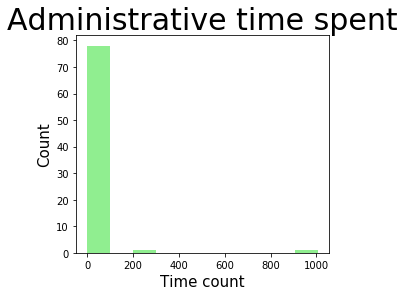

In [7]:
# visualizing the distribution of customers and time spent by them in Administrative area

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 2)
plt.hist(df['Administrative_Duration'], color = 'lightgreen')
plt.title('Administrative time spent',fontsize = 30)
plt.xlabel('Time count', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

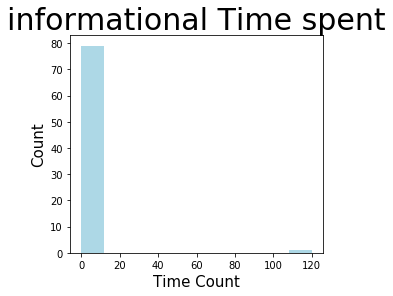

In [8]:
# visualizing the distribution of customers and time spent in Informational area

plt.subplot(1, 2, 2)
plt.hist(df['Informational_Duration'], color = 'lightblue')
plt.title('informational Time spent',fontsize = 30)
plt.xlabel('Time Count', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

# Perceptron 

In [21]:
import numpy as np
Xc=df.columns[0:]
X=df[Xc[1:7]].values
Y=df[Xc[7]].values
Y=Y.reshape(80,1)
print(X.shape)
print(Y.shape)
print(X[1:8])

(80, 6)
(80, 1)
[[ 0  0  0  2  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0 19  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  0]]


In [10]:
import numpy as np
import random
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=50):
        self.eta=eta # Learning rate (between 0.0 and 1.0)
        self.n_iter=n_iter  # Passes over the training dataset.
    def fit(self,X,y):  
        self.w_=np.random.random(1+X.shape[1])  
        for _ in range(self.n_iter):
            for xi, target in zip(X,y): 
                error=target-self.predict(xi)
                if error!=0:
                    update = self.eta * (target-self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update*1
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0, 1, 0)
ob=Perceptron(eta=0.01,n_iter=50)
ob.fit(X,Y)
print(ob.w_)


sum=0
for i in X:
    sum=sum+ob.net_input(i)
#print(sum)
avg=sum/200
print(avg)
#print(ob.predict([0,0,0,1,0]))
#print(ob.predict([0,0,0,2,0]))
res=ob.predict(X)

[-1.56981293e+01  6.44067741e+03  3.91345088e+00  1.80397053e+02
  4.51024058e+02  3.10874864e+02 -2.62658301e+00]
55075.66605750168


In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(Y,res))

Accuracy:0.03


# SVM(Support Vector Machine)

In [12]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', C=1, random_state=0)
svm.fit(X_train, np.ravel(y_train,order='C'))
y_pred=svm.predict(X_test)
#print('misclassified samples: %d' %(y_test!=y_pred).sum())#compute

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.94


# LVQ

In [15]:
import numpy as np
import random
#x=np.array([[0,0,1,1],[1,1,0,0]])
##x=X_train
#W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
#lr=0.6
#d=[0,0]
#e=1
##tar=y_train
def LVQ(x,tar):
    W=np.random.random((2,6))
    #W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
    lr=0.6
    d=[0,0]
    e=1
    while(e<=10):
      for i in range(x.shape[0]):
        for j in range(W.shape[0]):
          d[j]=np.sum((x[i,:]-W[j,:])**2)
          d[j]=d[j]**0.6
        #print(d)
        if(d[0]<d[1]):
          t=0
          #print("winning neuron is ",0)
        else:
          t=1
          #print("winning neuron is", 1)
        if(t==tar[i]):
          W[t,:]+=lr*(x[i,:]-W[t,:])
        else:
           W[t,:]-=lr*(x[i,:]-W[t,:])
      print("Updated weight at epoch ",e,"are ",W)
      e+=1
      lr=0.5*lr
    return W

In [16]:
W=LVQ(X_train,y_train)

Updated weight at epoch  1 are  [[-2.41585713e+02 -4.42781264e-09 -3.56524947e-11 -4.18258492e+00
  -2.67617611e+00 -1.85590889e-03]
 [ 9.75815176e+00  3.88819591e+01  4.38347000e+01 -8.79048032e+02
   1.74786429e+01 -2.44455765e+01]]
Updated weight at epoch  2 are  [[-7.36070566e+01 -1.09940919e-04 -3.22544837e-04  6.03492381e-01
  -1.05141570e+00  9.18177080e-02]
 [ 9.75815176e+00  3.88819591e+01  4.38347000e+01 -8.79048032e+02
   1.74786429e+01 -2.44455765e+01]]
Updated weight at epoch  3 are  [[-8.31731296e+01 -6.10790850e-03 -1.01849912e-01  6.48580088e-01
  -1.90745779e+00  7.85239145e-02]
 [ 9.75815176e+00  3.88819591e+01  4.38347000e+01 -8.79048032e+02
   1.74786429e+01 -2.44455765e+01]]
Updated weight at epoch  4 are  [[-6.47406261e+01 -2.73061672e-02 -7.79251974e-01  1.51675363e+00
  -2.54314419e+00  8.26126930e-02]
 [ 9.75815176e+00  3.88819591e+01  4.38347000e+01 -8.79048032e+02
   1.74786429e+01 -2.44455765e+01]]
Updated weight at epoch  5 are  [[-5.20548518e+01 -4.4438242

In [17]:
#print(W)
def LVQt(X,Y,W):
    d=[0,0]
    res=np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(W.shape[0]):
            d[j]=np.sum((X[i,:]-W[j,:])**2)
            d[j]=d[j]**0.6
        if d[0]<d[1]:
            res[i]=0
        elif d[0]==d[1]:
            res[i]=2
        else:
            res[i]=1
    return res
y_pred=LVQt(X_test,y_test,W)
#print(y_pred)
#print(y_test)
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))
print(y_pred)
print(y_test)

Accuracy:0.88
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [4]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


# SOM

In [18]:
import numpy as np
#x=np.array([[0,0,1,1],[1,1,0,0]])
def SOM(x,y):
    #W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
    W=np.random.random((2,6))
    lr=0.6
    d=[0,0]
    e=1
    res=np.zeros(y.shape)
    while(e<=3):
      for i in range(x.shape[0]):
        for j in range(W.shape[0]):
          d[j]=np.sum((x[i,:]-W[j,:])**2)
          d[j]=d[j]**0.6
        print(d)
        if(d[0]<d[1]):
          t=0
          res[i]=0
          print("winning neuron is ",0)
        else:
          t=1
          res[i]=1
          print("winning neuron is", 1)
        W[t,:]+=lr*(x[i,:]-W[t,:])
      print("Updated weight at epoch ",e,"are ",W)
      e+=1
      lr=0.5*lr
    return res

In [19]:
y_pred=SOM(X,Y)

[1.9839402098950638, 1.0045441137378859]
winning neuron is 1
[2.9474313403448043, 1.147431097269522]
winning neuron is 1
[1.9839402098950638, 0.5441265460858146]
winning neuron is 1
[2.9474313403448043, 0.7311891422567786]
winning neuron is 1
[15.988522872567751, 12.686470485959171]
winning neuron is 1
[34.283868041159955, 20.363521741066773]
winning neuron is 1
[1.9839402098950638, 21.855728103037105]
winning neuron is  0
[0.8282908452191137, 23.87728988804218]
winning neuron is  0
[2.2685789802956395, 19.946535542731365]
winning neuron is  0
[2.0531478883119485, 17.906799494089874]
winning neuron is  0
[0.6837419438737983, 17.906799494089874]
winning neuron is  0
[22.261271914876513, 2.200067029898272]
winning neuron is 1
[5.714044027683876, 12.542239861041205]
winning neuron is  0
[0.6631303189184031, 14.392912479626737]
winning neuron is  0
[4.832339438391172, 22.172092519138168]
winning neuron is  0
[126.54774612826898, 118.7598937652658]
winning neuron is 1
[2.9834842684044065, 7

In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(Y,y_pred))

Accuracy:0.85
